In [1]:
# Note: Before starting the slideshow, make sure you run this code as it
# provides helper functions that the other slides need...
#
# Other than that, you can ignore this content as it won't show up in the slideshow.
#
# It's a helper function that makes it easier to show OpenCV images directly
# in the notebook environment. When using OpenCV locally, you'll want to use
# `cv2.imshow(name, img)` instead.

import numpy as np
import cv2

# Notebook setup + convenience functions
%matplotlib inline
import matplotlib.pyplot as plt

def force_bgr(img):
    '''Forces image to 3-channel representation if grayscale'''
    if len(img.shape) == 2 or img.shape[2] == 1:
        return cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    return img

def imshow(*args):
    '''Helper function to show images, because matplotlib and OpenCV aren't a perfect match'''
    fig = plt.figure()
    for i, img in enumerate(args):
        fig.add_subplot(1,len(args),i+1)
        plt.imshow(cv2.cvtColor(force_bgr(img), cv2.COLOR_BGR2RGB))


# <center>Image processing using</center>

## <center>OpenCV + Python + mjpg-streamer</center>

<br/>

<center>Dustin Spicuzza (Team 2423/1418)</center>
<br/>
<center>September 10, 2016</center>
<br/>
<center><span style="color: #ababab">NE FIRST University Day</span></center>

# Agenda

* Why OpenCV + Python?
* Image filtering demo
* pynetworktables

# Why OpenCV?

* Originally developed by Intel
* It has thousands of image processing related algorithms and functions available
  * Highly optimized and reliable
  * Has building blocks that fit together
* Lets you do complex image processing without needing to understand the math
  * If you understand the math, it helps!

# Why OpenCV?

* Bindings for multiple languages
    * C/C++
    * Java
    * Python
* Multiple platforms supported
    * Windows
    * Linux
    * OSX
    * Android
* Oh, and it’s **FREE**!

# What OpenCV Provides

* Image I/O:
    * Read/Write images from disk
    * Use native OS functionality to interface with cameras
* Image Segmentation
    * Edge finding
    * Contour detection
    * Thresholding

# What OpenCV Provides

* Face detection
* Motion tracking
* Stereo vision support
* Support for GPU acceleration
* Machine learning operations
    * Classifiers
    * Neural networks

# What OpenCV Provides

* Distributed with lots of useful samples that you can use to figure out how OpenCV works
    * Face detection
    * Edge finding
    * Histograms
    * Square finder

Lots and lots and lots of stuff… 

# Why Python + OpenCV?

* Python is really easy to learn and use
    * Simple syntax
    * Rapid prototyping
* Most of the compute intensive work is implemented in C/C++
    * Python is just glue, realtime operation **is** possible
* NumPy is awesome
    * Manipulating image data is trivial compared to other OpenCV bindings (Java, C++)

# <center>Time to CODE!</center>

<center>Go to http://goo.gl/nB0NCG</center>

# About this environment

* It's a Jupyter Notebook (formerly IPython Notebook)
    * This slideshow uses Jupyter too!
    
* It allows you to mix text and executable code in a webpage
* You execute each cell using SHIFT-ENTER

# Hello World!

* Click the cell with the following text, and press SHIFT-ENTER

In [2]:
print("Hello world!")

Hello world!


# Next Steps

* Execute the helper code

* The next cell tells you about the images available in your environment

In [3]:
%ls images

2013-f0.png  2016-cmp-0.jpg  2016-cmp-5.jpg  2016-p0.jpg
2013-p0.png  2016-cmp-1.jpg  2016-dcmp1.jpg  2016-p1.jpg
2013-p1.png  2016-cmp-3.jpg  2016-dcmp2.jpg  2016-p2.jpg
2014-f0.png  2016-cmp-4.jpg  2016-dcmp3.jpg  2016-p3.jpg


# Hello image!

* Let's load an image and show it

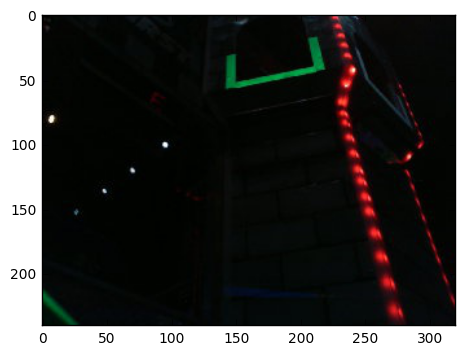

In [4]:
# Change this to load different images
img = cv2.imread('images/2016-cmp-5.jpg')
imshow(img)

# Hello image!

* You can show multiple images next to each other

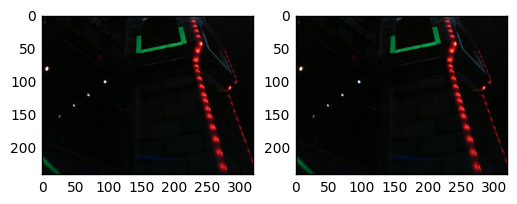

In [5]:
imshow(img, img)

# OpenCV Image Basics

* Images are stored as multidimensional arrays
    * Color images have 3 dimensions: height, width, channel
* Each pixel is a number stored in the array
* Numpy array notation allows you to do operations on individual pixels or ranges of pixels

In [6]:
img[50, 150, :]           # Access a single pixel

array([ 8, 19,  0], dtype=uint8)

In [7]:
x = img[24:42, 42:100, :]    # Access a range of pixels

# OpenCV Image Basics

* Color is represented by storing combinations of Red, Blue, and Green pixels in separate channels
    * OpenCV uses BGR representation, not RGB
* The amount of each individual color is represented in the individual channel
    * ‘dark’ is zero, ‘bright’ is 255
* Combine the channels to represent a color
    * Green = RGB( 0, 255, 0 )
    * Deep Pink = RGB( 255, 20, 147 )

# OpenCV Image Basics

* Using numpy we can easily fill an image with a single color

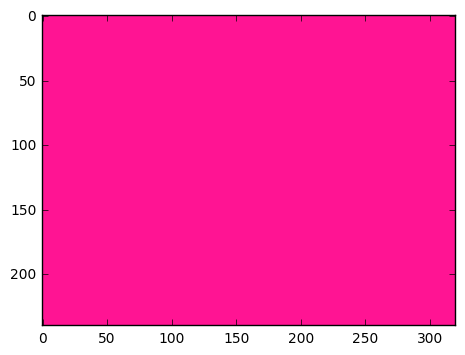

In [8]:
# define image with height=240, width=320, 3 channels
shape = (240, 320, 3)
pink_img = np.empty(shape, dtype=np.uint8)

# Fill every pixel with a single color
pink_img[:] = (147, 20, 255)

imshow(pink_img)

# Practical Example

* 2016 FIRST Stronghold: find targets that are surrounded by retroreflective tape, and shoot boulders into them

# Practical Example
* Finding gray tape at a distance isn’t particularly easy
    * Key part of image processing is removing as much non-essential information from image 
* We can do better!

# Retroreflective Tape

* It has a useful property -- it reflects light directly back at the source
* What can we do with this property?

* Shine bright LEDs at the target and the tape reflects that color back to the camera
    * Many teams have found that green light works best
* Reduce exposure of camera so only bright light sources are seen 

# Retroreflective Tape

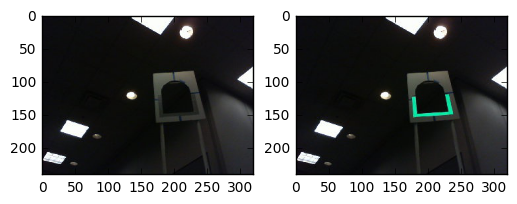

In [9]:
img1 = cv2.imread('images/2016-p0.jpg')
img2 = cv2.imread('images/2016-p1.jpg')
imshow(img1, img2)

# Practical Example

Processing steps to find targets:

* Isolate the green portions of the image
* Analyze the green portions to determine targets

**Note**: There are a lot of ways to go about this, I'm just showing you one way

# Identify the green

* What is “green” anyways?
    * <span style="color: green">This is green.</span> <span style="color: darkgreen">This is also green.</span>
* To a computer, green is really a range of colors
* An object’s color changes depending on lighting conditions
* We can transform the image to identify colors independent of lighting conditions

# Identify the green

* Convert the image from RGB to HSV
    * Hue: the color
    * Saturation: Colorfulness
    * Value: Brightness

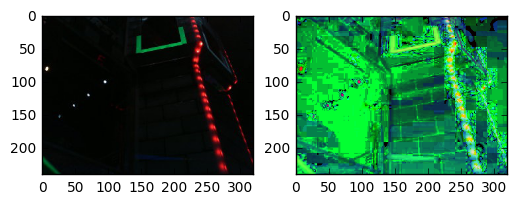

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imshow(img, hsv)

# Identify the green

That doesn't show why HSV is useful. Let's look at the individual channels instead.

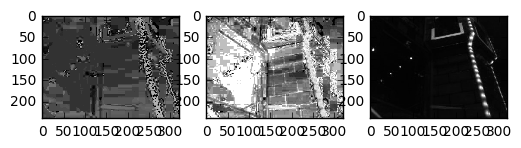

In [11]:
h, s, v = cv2.split(hsv)
imshow(h, s, v)

# Identify the green

* Green is a range of values present in the image
* ‘Threshold’ the image to get rid of the colors that we don’t care about
* Lots of ways to do this
    * Manually specify values
    * Automated methods

# Identify the green

`cv2.inRange` can threshold an image given two ranges of pixels.
* Wanted values are converted to 255
* Unwanted values are now 0

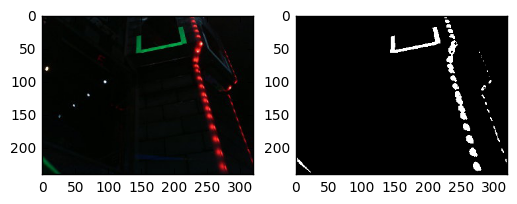

In [15]:
lower = np.array([0, 145, 80])
upper = np.array([255, 255, 255])

filtered = cv2.inRange(hsv, lower, upper)
imshow(img, filtered)

# Identify the green

Sometimes, you end up with holes in your output

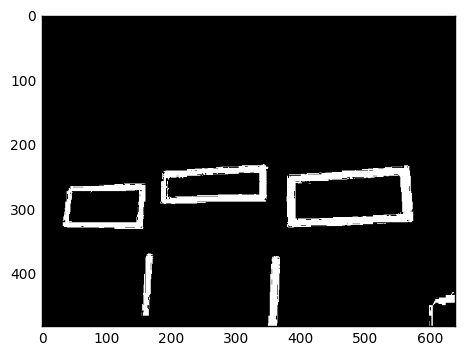

In [16]:
img3 = cv2.imread('images/2013-f0.png')
hsv3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

# Thresholds are different because different camera/lighting
lower3 = np.array([30, 188, 16])
upper3 = np.array([75, 255, 255])
filtered3 = cv2.inRange(hsv3, lower3, upper3)
imshow(filtered3)

# Identify the green

* We can use a morphological operation to fill in the holes
    * Various types of morphology operations available
* They modify a pixel based on the values of its neighboring pixels
    * The one we use to fill in holes is a “closing” operation

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2), anchor=(1,1))
output = cv2.morphologyEx(filtered3, cv2.MORPH_CLOSE, kernel,
                          iterations=9)
imshow(output)

# Identifying Targets

Use `findContours()` to find regions of interest
* Returns a list of points bounding each separate blob in the image (called a contour)
* Also returns a hierarchy so you can determine whether a contour is entirely inside another contour

In [17]:
image, contours, hierarchy = cv2.findContours(filtered,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)

# Identifying Targets

If you want to see what it found, you can draw the found contours.

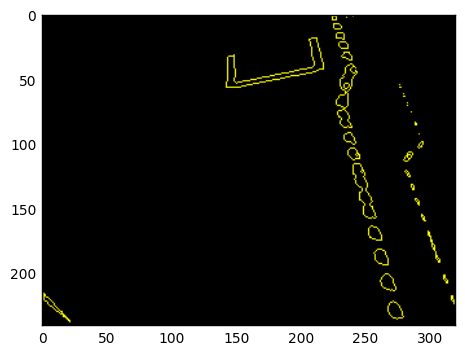

In [18]:
dst = np.zeros(shape=img.shape, dtype=img.dtype)
cv2.drawContours(dst, contours, -1, (0, 255, 255), 1)
imshow(dst)

As you can see, contours aren't the whole story. Let's try to remove as many as we can:

# Magic?

In [19]:
min_width = 20 # in pixels
results = []

# Iterate over each contour
for c in contours:
    
    # Contours are jagged lines -- smooth it out using an approximation
    a1 = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True)
    
    # This fills in the contour so that it's a rectangle
    hull = cv2.convexHull(c)
    
    # Approximate the points again, smoothing out the hull
    a2 = cv2.approxPolyDP(hull, 0.01*cv2.arcLength(hull, True), True)
    
    # We only care about objects that are wider than they are tall, and things wider
    # than a particular width. Only keep things that meet that criteria.
    _, _, w, h = cv2.boundingRect(a2)
    if w > h and w > 20 and len(a2) in (4,5):
        results.append(a2)

# Magic?

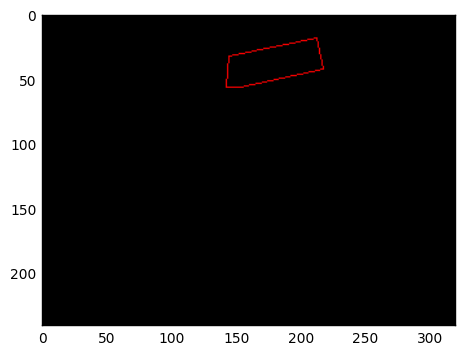

In [20]:
# Finally, draw out our results
dst = np.zeros(shape=img.shape, dtype=img.dtype)
cv2.drawContours(dst, results, -1, (0, 0, 255), 1)
imshow(dst)

# Now what?

We have targets... probably should do something with them?